# Question 1 - Stochastic Gradient Descent (30 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 5 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'Adagrad'. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). (2pts) Report the MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad.

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


3. (5pts) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why?


## Answer 

### 1.

Answer: See below
<img src="q1_1.jpg">

### 2.

In [82]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) #one coef for each of the terms
        self.eps = 10**-6 #used only for adagrad
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum


        
    def sgd(self, gradient):
        '''
        updates self.coef based on gradient using SGD
        '''
        self.coef = (self.coef - (self.learning_rate*gradient))
        return self.coef
        
    
    def adagrad(self, gradient):
        '''
        updates self.coef based on gradient using Adagrad
        '''
        self.cache = self.cache + gradient**2
        self.coef = self.coef - ((self.learning_rate*gradient)/(self.eps+self.cache)**0.5)
        return self.coef
    
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.cache = (self.mu*self.cache) + (1-self.mu)*gradient
        self.coef = self.coef - (self.learning_rate*self.cache)
        return self.coef
    
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        
        '''
        Fits the model for the given X, y. It uses the update rule mentioned by the parameter update_rule
        and displays a plot of the coefficients vs epochs and mse vs epochs if plot is True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the respective update rule and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        
        x_features = self.get_features(X)
        mse_list = []
        w0 = []
        w1 = []
        w2 = []
        w3 = []
        w4 = []
        
        
        for epoch in range(self.n_epoch):
            for i in range(len(y)):
                
                pred = self.linearPredict(x_features[i])
                dot = np.array(x_features[i]).T.dot(y[i]-pred)
                grad = -2*dot + 2*self.regularization * self.coef
                
                if update_rule == 'sgd':
                    self.coef = self.sgd(grad)
                elif update_rule =='adagrad':
                    self.coef = self.adagrad(grad)
                elif update_rule =='sgd_momentum':
                    self.coef = self.sgd_momentum(grad)
                if y[i]-pred > 9999:
                    break
            
            pred = self.linearPredict(x_features)
            mse = mean_squared_error(pred, y)
            mse_list.append(mse)
            w0.append(self.coef[0])
            w1.append(self.coef[1])
            w2.append(self.coef[2])
            w3.append(self.coef[3])
            w4.append(self.coef[4])
            
                
        if plot==True:
            f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,12))
            ax1.plot(mse_list, marker='o',linestyle='dotted')
            ax1.set_title('MSE vs Epochs')
            ax1.set_xlabel('Epochs')
            ax1.set_ylabel('MSE')
            ax2.plot(w0, marker='o',linestyle='dotted', label='W0')
            ax2.plot(w1, marker='o',linestyle='dotted', label='W1')
            ax2.plot(w2, marker='o',linestyle='dotted', label='W2')
            ax2.plot(w3, marker='o',linestyle='dotted', label='W3')
            ax2.plot(w4, marker='o',linestyle='dotted', label='W4')
            ax2.set_xlabel('Epochs')
            ax2.set_ylabel('Coefficients')
            ax2.set_title('Coefficients vs Epochs: Learning Rate = {} Regularizaiton = {}'.format(self.learning_rate,self.regularization))
            ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        return mse
            

    def get_features(self, X):
        '''
       X (input) is the nx2 dimensional array - n data points with X_1 and X_2.
       It returns a nX5 dimensional array - n data points with 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3.
       '''
        one = []
        x1 = []
        x2 = []
        x3 = []
        x4 = []

        for x in X:
            x1.append(x[0])
            x2.append(x[0]*x[1])
            x3.append((x[0]**2)*(x[1]**2))
            x4.append(x[1]**3)
            one.append(1)

        x_features = np.column_stack((one, x1, x2, x3, x4))
        return x_features
        
    def linearPredict(self, X_features):        
        '''returns the dot product of X and self.coef'''
        return np.matmul(X_features, self.coef)



In [83]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

### Using SGD


Best MSE: 


0.020634004333394778

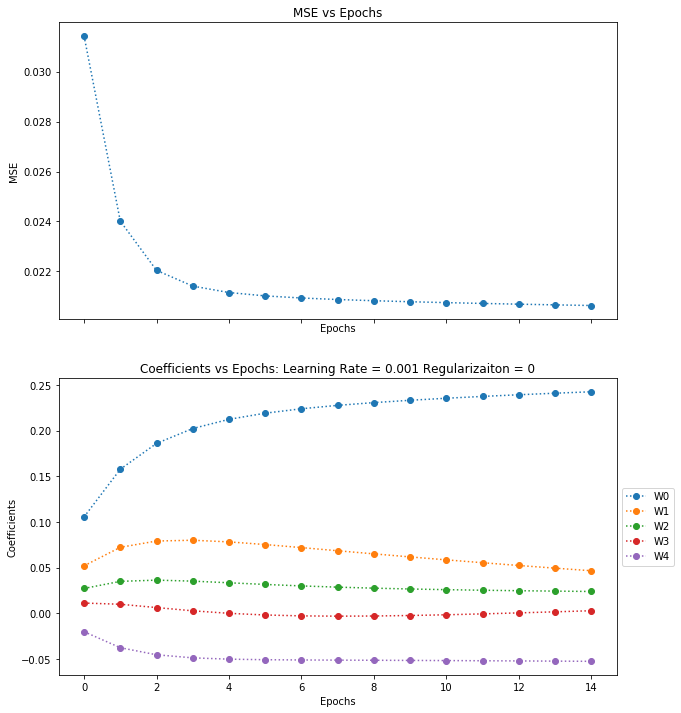

In [84]:
from sklearn.metrics import mean_squared_error
best_mse = []
place_holder = []
for x in learning_rate:
    for z in regularization:
        reg = LinearRegression(x, z, n_epochs)
        best = reg.fit(X,y, update_rule='sgd')
        best_mse.append(best)
        place_holder.append([x,z])
        
print('Best MSE: ')
best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[best_index][0], place_holder[best_index][1], n_epochs)
best.fit(X,y, update_rule='sgd', plot=True)


2nd Best MSE: 


0.02636878158524711

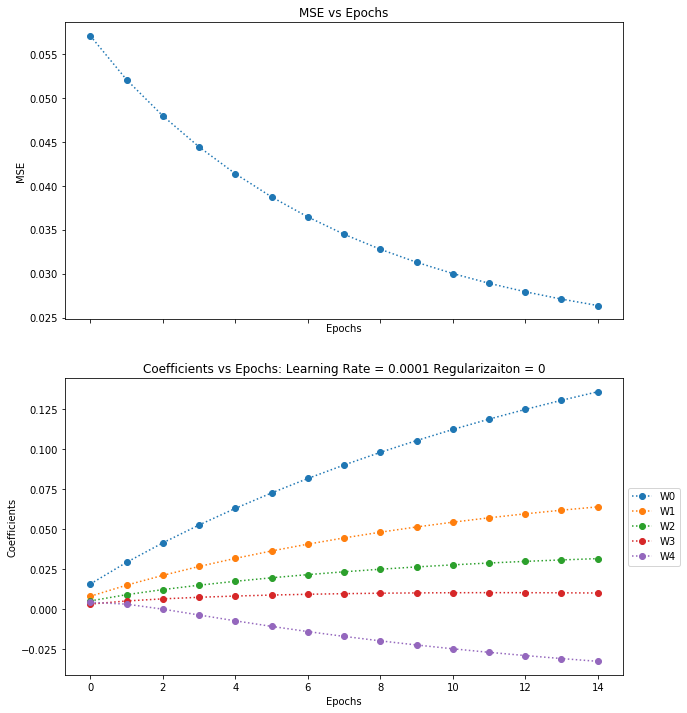

In [85]:
print('2nd Best MSE: ')
best_index_2 = best_mse.index(sorted(best_mse)[1]) 
best_2 = LinearRegression(place_holder[best_index_2][0], place_holder[best_index_2][1], n_epochs)
best_2.fit(X,y, update_rule='sgd', plot=True)

### Using SGD-Momentum

0.02039798653452957

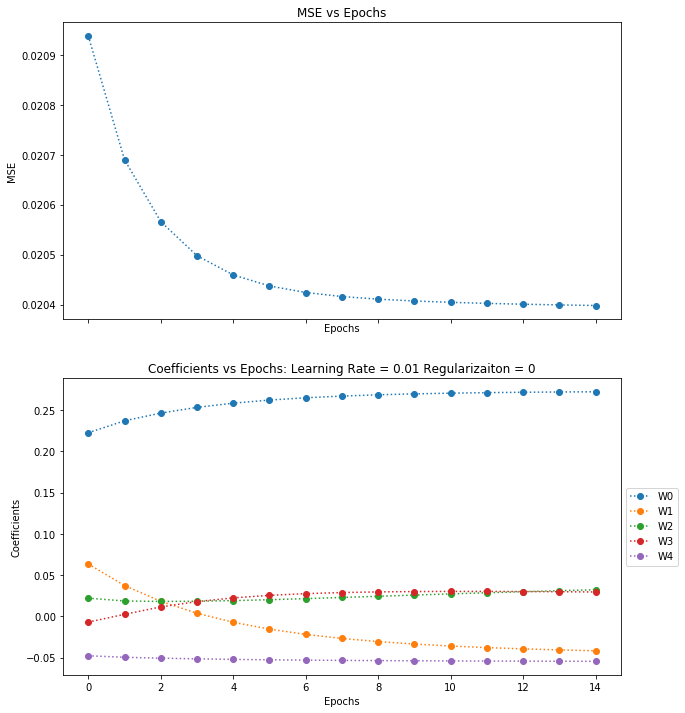

In [86]:
best_mse = []
place_holder = []
for x in learning_rate:
    for z in regularization:
        reg = LinearRegression(x, z, n_epochs)
        best = reg.fit(X,y, update_rule='sgd_momentum')
        best_mse.append(best)
        place_holder.append([x,z])
        
        
best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[best_index][0], place_holder[best_index][1], n_epochs)
best.fit(X,y, update_rule='sgd_momentum', plot=True)

2nd Best MSE: 


0.0206163292489942

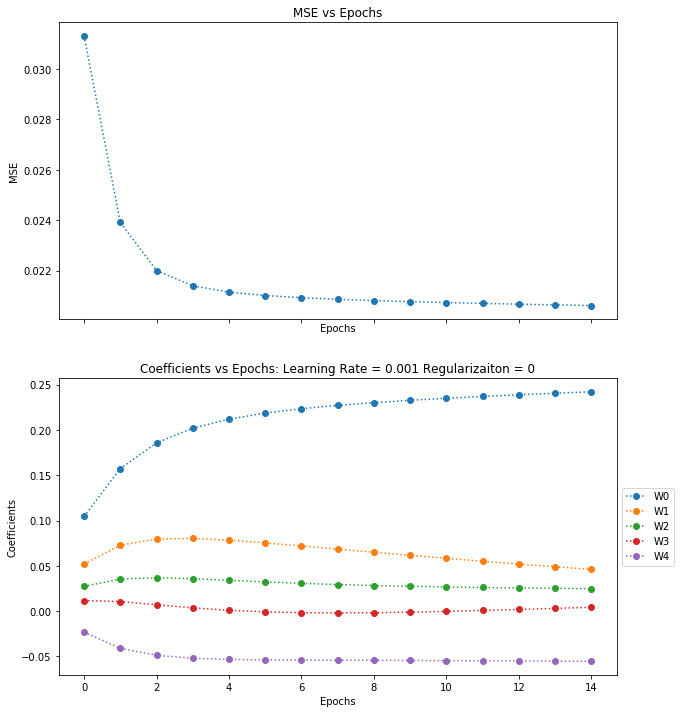

In [87]:
print('2nd Best MSE: ')
best_index_2 = best_mse.index(sorted(best_mse)[1]) 
best_2 = LinearRegression(place_holder[best_index_2][0], place_holder[best_index_2][1], n_epochs)
best_2.fit(X,y, update_rule='sgd_momentum', plot=True)

### Using Adagrad

0.02023621336476742

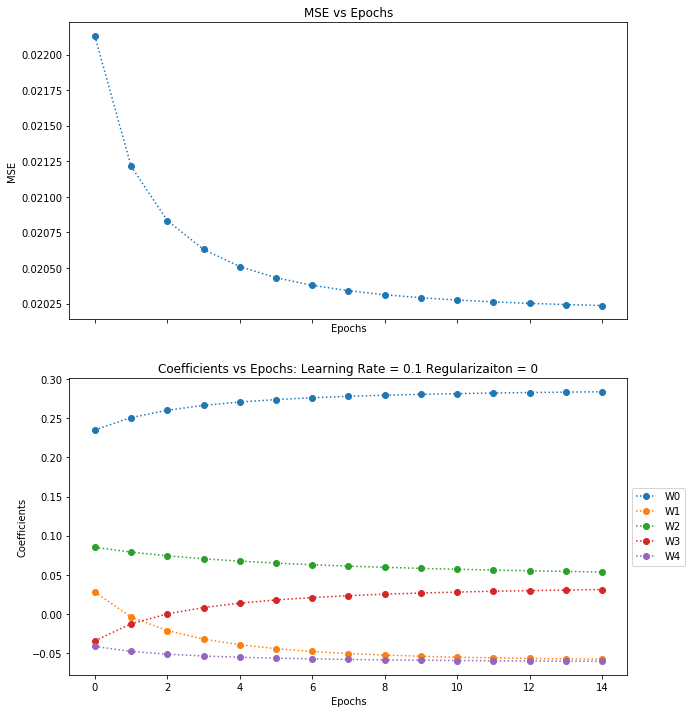

In [88]:
best_mse = []
place_holder = []
for x in learning_rate:
    for z in regularization:
        reg = LinearRegression(x, z, n_epochs)
        best = reg.fit(X,y, update_rule='adagrad')
        best_mse.append(best)
        place_holder.append([x,z])
        
        
best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[best_index][0], place_holder[best_index][1], n_epochs)
best.fit(X,y, update_rule='adagrad', plot=True)

2nd Best MSE: 


0.021012616157499216

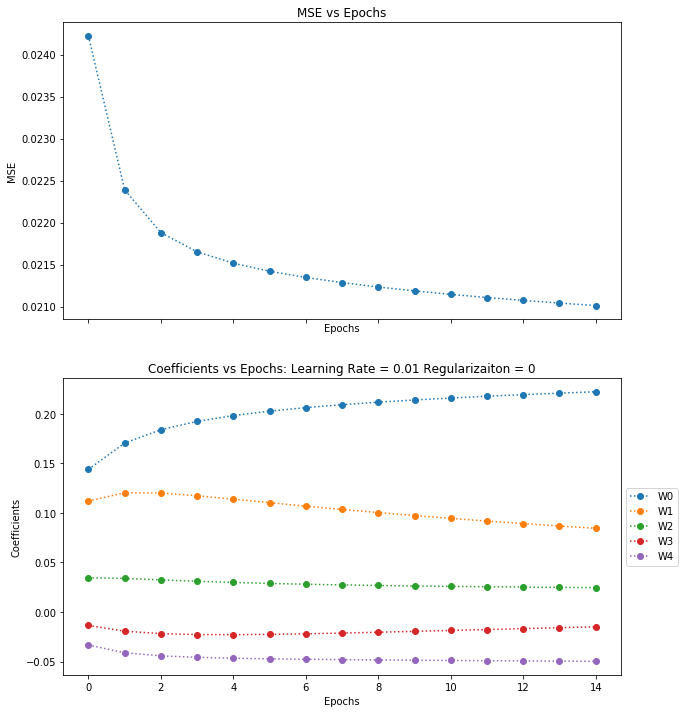

In [89]:
print('2nd Best MSE: ')
best_index_2 = best_mse.index(sorted(best_mse)[1]) 
best_2 = LinearRegression(place_holder[best_index_2][0], place_holder[best_index_2][1], n_epochs)
best_2.fit(X,y, update_rule='adagrad', plot=True)

### 3.

Ans. <br/>
Adagrad, because the learning rate is adjusted based on past gradients, so a higher initial learning rate can scale down to lower levels when we are near the minimum.


# 2.  Tensor Playground (25pts)
Visit http://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the 4th of the four data sets (the spiral data which is bottom right).  

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 10, learning rate 0.03, one hidden layer with 4 neurons, input as X_1, X_2 and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(4 values). What difference do you observe in the decision boundary? Why? (4 pts)

2) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (6 values). What do you observe in the decision boundary as the number of neurons increases? Why? (4 pts)

3) Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 3, 0.3, 0.03 and 0.003 (8 values). What do you observe in the loss curves? Explain. (4 pts)

4) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Use two hidden layers - first hidden layer with 6 neurons and second hidden layer with 4 neurons. Report the train, test values at the end of 2000 epochs (2 values) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. (5 pts).

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be atmost 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  (8 pts)
 

### ANSWER

### 1. 
For Tanh activation function: (train_loss, test_loss) = (0.330, 0.448) <br/>
For Linear activation function: (train_loss, test_loss) = (0.455, 0.493) <br/>
<br/>
The decision boundary for the linear activation function remains linear as we run more epochs, while the decision boundary for tanh function tries to fit the inner circles as we run more epochs. The tanh function manages to fit the inner circles because it is not linear.

### 2. 
For 2 neurons in the hidden layer: (train_loss, test_loss) = (0.457, 0.494) <br/>
For 4 neurons in the hidden layer: (train_loss, test_loss) = (0.380, 0.474) <br/>
For 8 neurons in the hidden layer: (train_loss, test_loss) = (0.223, 0.394) <br/>
<br/>
The decision boundary gets more complex as the numbers of neurons increases, because when we view the hidden layers as generated features, more neurons equals to more features, which gives us more complex combinations.

### 3.
End of 100 epochs: <br/>
learning rate 3: (train_loss, test_loss) = (0.590, 0.698) <br/>
learning rate 0.3: (train_loss, test_loss) = (0.467, 0.489) <br/>
learning rate 0.03: (train_loss, test_loss) = (0.452, 0.492) <br/>
learning rate 0.003: (train_loss, test_loss) = (0.457, 0.494) <br/>
<br/>
End of 1000 epochs: <br/>
learning rate 3: (train_loss, test_loss) = (0.523, 0.644) <br/>
learning rate 0.3: (train_loss, test_loss) = (0.467, 0.489) <br/>
learning rate 0.03: (train_loss, test_loss) = (0.378, 0.489) <br/>
learning rate 0.003: (train_loss, test_loss) = (0.451, 0.493)

When the learning rate is too large, the loss curves can become osccillating and get stuck. With a learning rate at the middle, the neural network manages to find another minimum after stagnating for a couple of epochs. When the learning rate is too small, the neural network trains too slow and we stop before it finds the other miminum.


### 4.

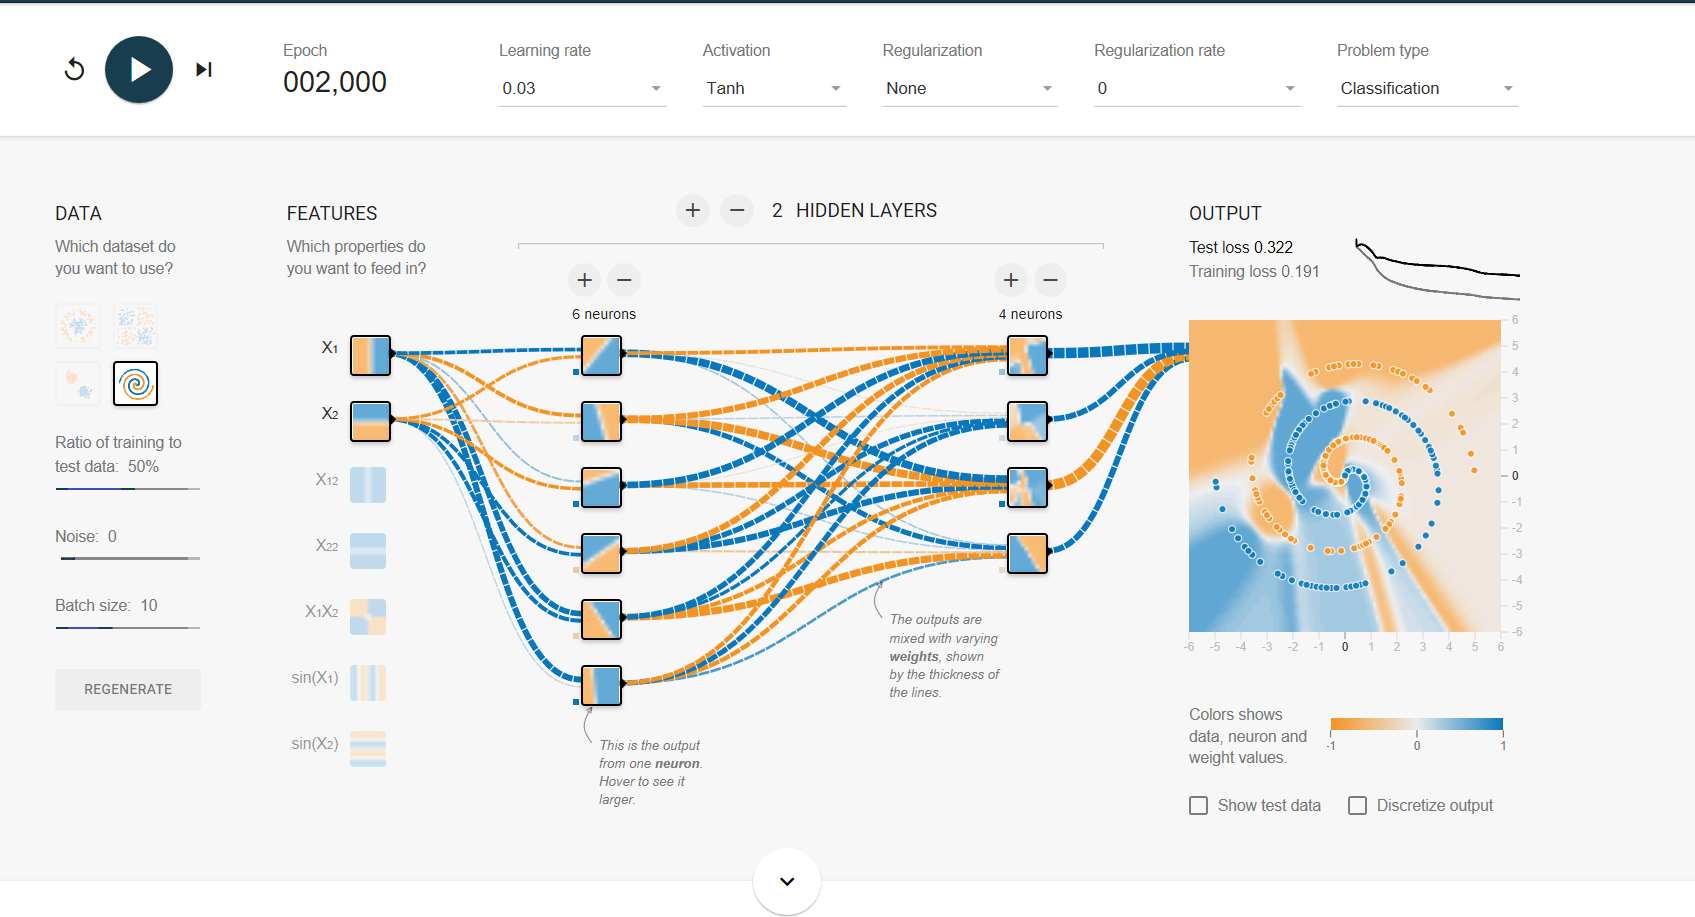

In [90]:
#PART 2
from IPython.display import Image
Image("q2_4.png")

With another layer, the neural nework is able to make more funky combinations and generate more complicated features, thus it fits the training data even better. And in our case, is able to achieve better prediction performance also.

### 5.

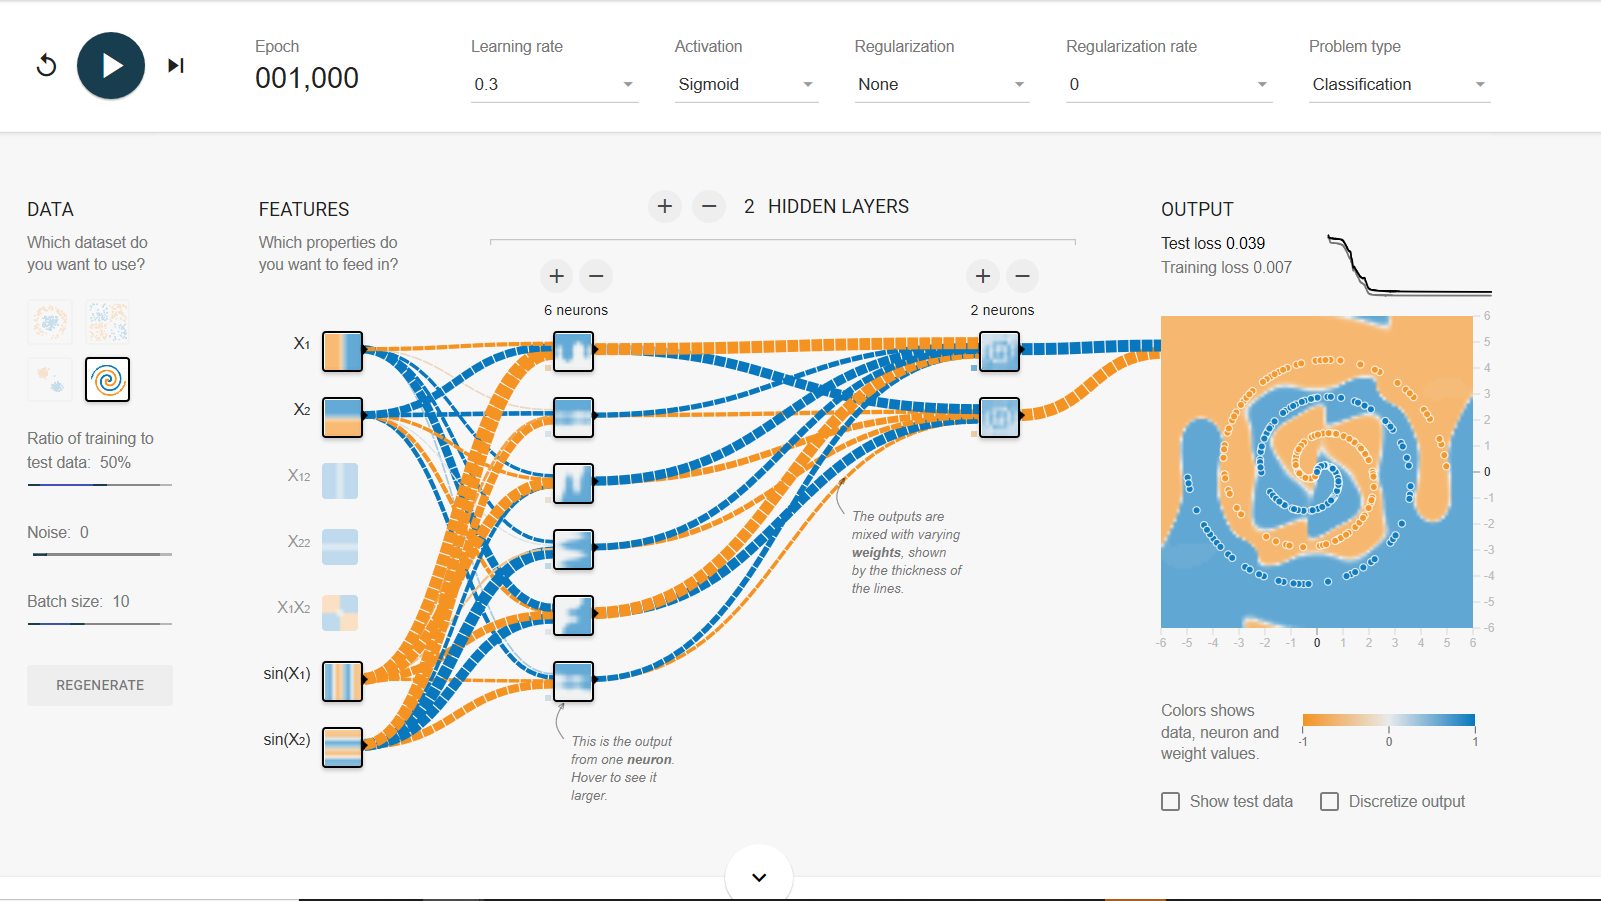

In [91]:
Image("q2_5.png")

Best result found: (train_loss, test_loss) = (0.007, 0.039) <br/>
<br/>
Learning rate: <br/>
I started with 3 but there were too much oscillations, so i slowly decreased until 0.3, which trained reasonably faster but cound also converge. <br/>
Features: <br/>
The class of our data points seem to switch back and forth as we move along the X or Y axis, so i chose sin(X1) and sin(X2). X12, X22 seem to work when there are centroids, but centroids are not a pattern inside our data, so I leave them out. X1X2 seems to work when there is some correlation betwen the X and Y axis, a pattern which is also not inside our current data, so I also leave it out. <br/>
Layers: <br/>
Witn only 1 hidden layer, the neural network had trouble finding 'circular' patterns, so I added one more layer and it started finding those patterns. <br/>
Neurons per layer: <br/>
I tried to generate 'alternating' patterns with the first hidden layer, and 'circular' patterns with the second hidden layer. 6 and 2 neurons in each hidden layer generated the results that I was looking for.

# Question 3: Decision Trees

1. (5pts) In this question, we will learn to build a Decision Tree classifier. Load the q3_dataset.csv from the files. The column named 'label' is the $Y$ we are trying to predict using the features given in all other columns. As usual, we first split the data in a train and test set and build our model on train set and test the performance on the test set. Use the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to fit a model with default parameters and report its performance on the test data. Now, visualize the tree, for visualisation, if your classifier object is called clf, use the given commands to save the generated tree as a '.dot' file using export_graphviz(https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/) to generate the tree.


In [92]:
## read data
from sklearn.model_selection import train_test_split
data= pd.read_csv('q3_dataset.csv')
x = data.drop(['label'],axis=1)
y = data.label.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [93]:
## create train/test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
confusion_matrix(y_test,pred)

array([[63,  3],
       [ 4, 44]], dtype=int64)

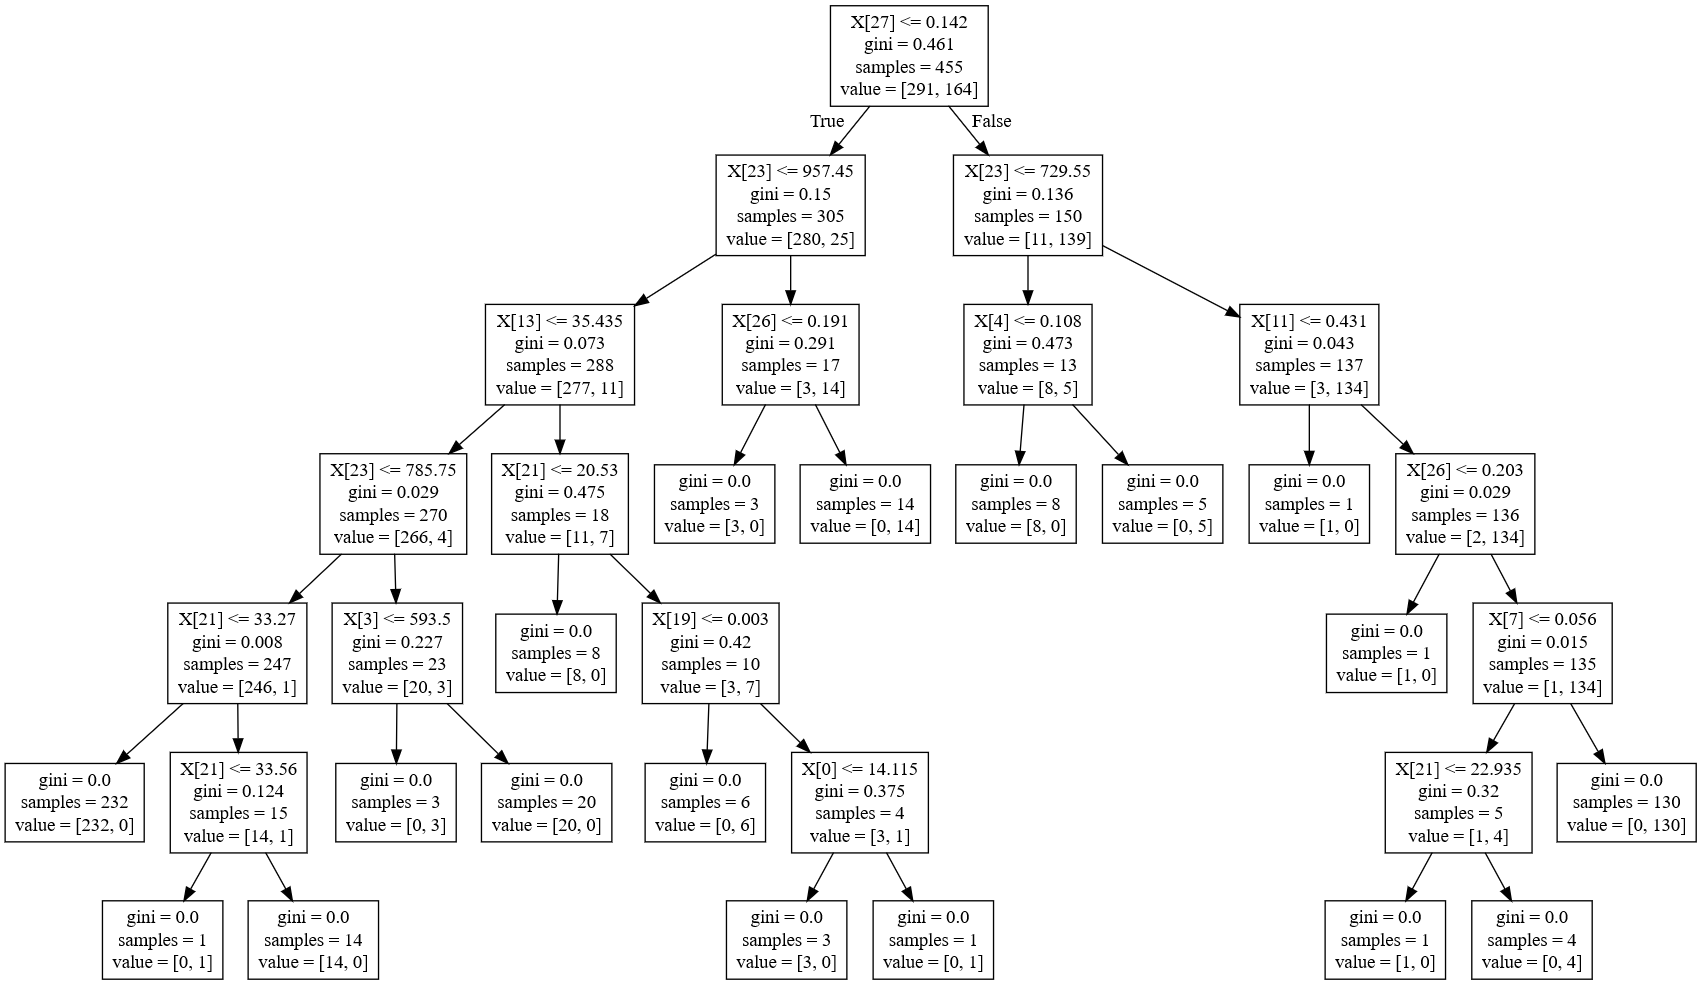

In [94]:
## save tree as .dot
from sklearn import tree
with open("file_name.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

Image("q3_1.png")

2. (10pts) We can guide the learning of a Decision Tree classifier by specifying various parameters governing its construction. For example, the max_depth parameter forces the algorithm to stop after at most that many levels, the min_samples_split parameter lower bounds the amount of data required to split nodes when learning and the parameter called criterion determines what function to use to create splits at each node. For both type of criteria, gini and entropy, test the max_depth values in the range 1, 2, ..., 20 , and min_samples_split in the range $2^{1}, 2^{2}, ..., 2^{15}$. Visualise the best classification trees that you get for different criterion parameter and observe how do they differ. 

Top Score:
 0.9736842105263158
Max Depth of Top Score:
 2
Min Samples Split of Top Score:
 256


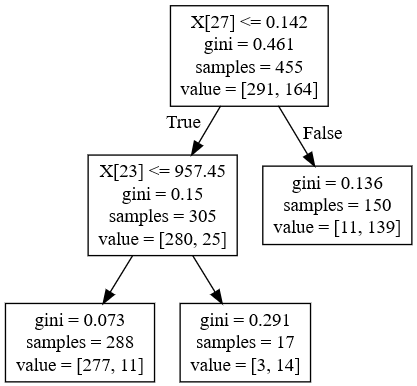

In [95]:
# Gini criteria
import math
score = []
best_d = []
best_s = []
count = 0
max_depth = np.arange(1,21)
min_samples_split = np.geomspace(2,2**15+1,num=15,dtype=int)

for d in max_depth:
    for s in min_samples_split:
        clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=d, min_samples_split=s)
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        #score.append(accuracy_score(pred,y_test))

        if count == 0:
            score.append(accuracy_score(pred,y_test))
            best_d.append(d)
            best_s.append(s)
        elif accuracy_score(pred,y_test) > score[-1]:
            score.append(accuracy_score(pred,y_test))
            best_d.append(d)
            best_s.append(s)
        count = count + 1

print('Top Score:\n', score[-1])
print('Max Depth of Top Score:\n', best_d[-1])
print('Min Samples Split of Top Score:\n', best_s[-1])
        
#best_d = math.ceil(np.argmax(score)/len(min_samples_split))-1
#best_s = np.argmax(score) - len(min_samples_split)*best_d -1

clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=best_d[-1], min_samples_split=best_s[-1])
clf.fit(x_train,y_train)
with open("gini.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    
Image("q3_2_gini.png")

Top Score:
 0.9649122807017544
Max Depth of Top Score:
 3
Min Samples Split of Top Score:
 32


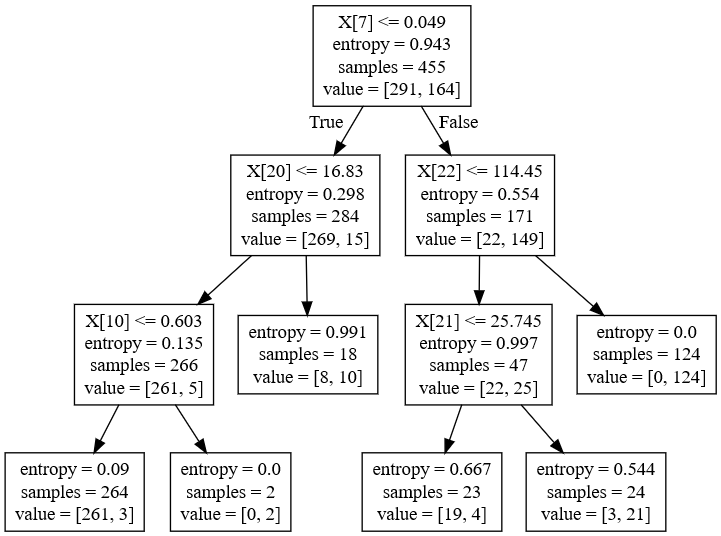

In [96]:
# Enthropy criteria
import math
score = []
best_d = []
best_s = []
count = 0
max_depth = np.arange(1,21)
min_samples_split = np.geomspace(2,2**15+1,num=15,dtype=int)

for d in max_depth:
    for s in min_samples_split:
        clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=d, min_samples_split=s)
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        #score.append(accuracy_score(pred,y_test))
        
        if count == 0:
            score.append(accuracy_score(pred,y_test))
            best_d.append(d)
            best_s.append(s)
        elif accuracy_score(pred,y_test) > score[-1]:
            score.append(accuracy_score(pred,y_test))
            best_d.append(d)
            best_s.append(s)
        count = count + 1

print('Top Score:\n', score[-1])
print('Max Depth of Top Score:\n', best_d[-1])
print('Min Samples Split of Top Score:\n', best_s[-1])
        
#best_d = math.ceil(np.argmax(score)/len(min_samples_split))-1
#best_s = np.argmax(score) - len(min_samples_split)*best_d -1

clf = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=best_d[-1], min_samples_split=best_s[-1])
clf.fit(x_train,y_train)
with open("entropy.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    
Image("q3_2_entropy.png")

## Question 4: Bayes Optimal Classification (5 pts)

1. Consider the following classification problem with only one input feature. We have two biased coins, coin 1 and 2. For coin 1, $P(heads) = p$ and for coin 2, $P(heads) = q$. We know that $p > q$. Given the output of a coin toss, we have to predict which coin was used for this toss. Assume we select both the coins for tossing with equal probability. What is the Bayes optimal classifier and what is its error rate?

Bayes optimal classifier: <br/>
-if result = Heads, predict coin 1 <br/>
-if result = Tails, predict coin 2 <br/>
<br/>
Error rate: 0.5 - 0.5(p-q)